# 2021/12/16
# 论文用图version1.0
# 季风爆发前的背景条件
# 爆发日期时间序列 2m温度 感热纬向剖面 等熵线+垂直流场

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

# 分别绘图
## 时间序列

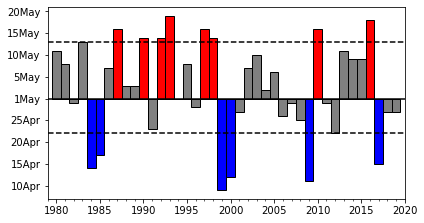

In [2]:
with open("/home/sun/data/onsetdate.json",'r') as load_f:
    a = json.load(load_f)

year = np.array(list(a.keys()))    ;  year  =  year.astype(int)
day  = np.array(list(a.values()))  ;  day   =  day.astype(int)

# 筛选 晚年用红色，早年用蓝色
a  =  np.zeros(40,dtype=int).astype(dtype=str) ; a[:]  =  'grey'
color_list  =  a.tolist()#  ;  color_list[:]  =  'grey'

for i in range(0,40):
    if day[i] < np.mean(day) - np.std(day):
        color_list[i]  =  'blue'
    if day[i] > np.mean(day) + np.std(day):
        color_list[i]  =  'red'

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# 设置y轴
y_label  =  ['10Apr','15Apr','20Apr','25Apr','1May','5May','10May','15May','20May']

fig,axs  =  plt.subplots(tight_layout=True)

# axs.set_yticks(np.arange(90, 160,10))

axs.bar(year,day-120,width=1,color=color_list,edgecolor='black')
# 刻度设置
axs.set_xlim(1979,2020)
axs.xaxis.set_major_locator(MultipleLocator(5))
axs.xaxis.set_minor_locator(MultipleLocator(1))

axs.set_yticks(np.arange(-20,25,5))
axs.set_yticklabels(y_label)

axs.plot([1979,2020],[0,0],color='black')
axs.plot([1979,2020],[np.ceil(np.mean(day)-np.std(day))-120,np.ceil(np.mean(day)-np.std(day))-120],color='k',linestyle='dashed')
axs.plot([1979,2020],[np.floor(np.mean(day)+np.std(day))-120,np.floor(np.mean(day)+np.std(day))-120],color='k',linestyle='dashed')

axs.set_aspect(0.5)

plt.savefig('/home/sun/paint/lunwen/version1.0/bob_time_seris.pdf',dpi=2000)

plt.show()

## 2m温度

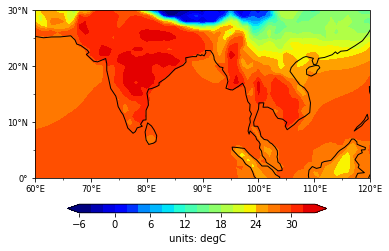

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

lon_slice  =  slice(60,120)
lat_slice  =  slice(-10,30)
time_slice =  slice(1,30)

props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
lonmin,lonmax,latmin,latmax  =  60,120,0,30
extent     =  [lonmin,lonmax,latmin,latmax]

f = xr.open_dataset("/home/sun/qomo-data/composite-merra2-single.nc").sel(lon=lon_slice,lat=lat_slice,time=time_slice)

viridis = cm.get_cmap('jet', 24)
newcolors = viridis(np.linspace(0, 0.9, 22))
newcmp = ListedColormap(newcolors)
#newcmp.set_under('white')
#newcmp.set_over('white')

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()
    
ax = fig1.add_subplot(111,projection=proj)

# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data-273.15,axis=0),21,cmap=newcmp,alpha=1,extend='both')
ax.coastlines(resolution='110m',lw=1)
#im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data,axis=0),cmap='coolwarm',alpha=1,extend='both')



fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal',label='units: degC')

plt.savefig("/home/sun/paint/lunwen/version1.1/fig2a_v1.1_april_t2m.pdf",dpi=300)

## 感热纬向剖面

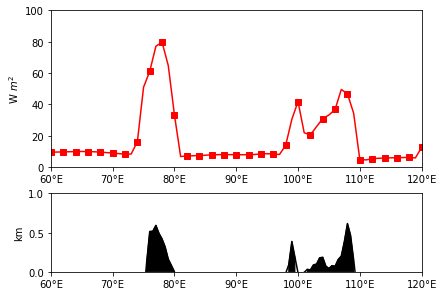

In [38]:
# 绘图设置
x_tick_labels=[]
for xx in range(60,130,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")



f2 = xr.open_dataset("/home/sun/qomo-data/composite_shlh.nc").sel(lon=lon_slice,lat=slice(30,-10),time=time_slice) #其实是用era5的数据，这里纬度是反着来的
sh_average1  =  -1*np.average(f2.SSHF.data,axis=0)/86400
sh_average2  =  np.average(sh_average1[15:20],axis=0)

f3  =  xr.open_dataset("/home/sun/qomo-data/gebco/bathymetric.nc").sel(lat=slice(10,15))
elevation  =  np.average(f3.elevation,axis=0)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=3, ncols=3)

ax0  =  fig.add_subplot(gs[:-1,:])
ax0.plot(f2.lon.data,sh_average2,color='red',linewidth=1.5,marker='s',markevery=2)

ax0.set_ylim((0,100))
ax0.set_xlim((60,120))
ax0.set_xticks(np.linspace(60,120,7))
ax0.set_xticklabels(x_tick_labels)
ax0.set_ylabel('W $m^2$')


ax1  = fig.add_subplot(gs[-1,:])
ax1.plot(f3.lon.data,elevation/1000,color='black',linewidth=1.5)

ax1.set_ylim((0,1))
ax1.set_xlim((60,120))
ax1.set_xticks(np.linspace(60,120,7))
ax1.set_xticklabels(x_tick_labels)
ax1.set_ylabel('km')

ax1.fill_between(f3.lon.data,0,elevation/1000,where=elevation>0,color='k')

plt.savefig("/home/sun/paint/lunwen/version1.0/sensible_heating_and_dixing.pdf",dpi=1200)